#### <a id='e'></a>
<h1 style='background-color:#EF4086;font-family:newtimeroman;font-size:350%;text-align:center;border-radius:15px 50px;'>The Mountain Car Problem
</h1>

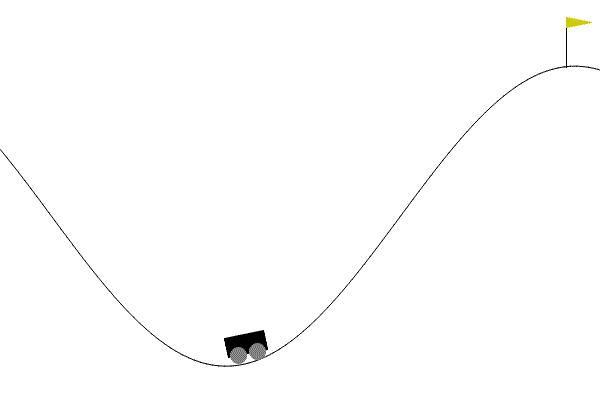

<div style="border-radius:10px; border:maroon solid; padding: 15px; background-color: white; font-size:110%; text-align:left">
<a id="contents_tabel"></a>
<h3 align="left"><font color='magenta'>Introduction
</font></h3>

### On the OpenAI Gym website, the Mountain Car problem is described as follows:

#### A car is on a one-dimensional track, positioned between two “mountains”. The goal is to drive up the mountain on the right; however, the car’s engine is not strong enough to scale the mountain in a single pass. Therefore, the only way to succeed is to drive back and forth to build up momentum.   

<div style="border-radius:10px; border:maroon; padding: 15px; background-color: #F8EBEE; font-size:100%; text-align:left">
    
<a id="bivariate_cat"></a>
# <b><span style='color:purple'>To begin with this environment, import and initialize it as follows:</span></b>

In [1]:
! pip install gym[classic_control]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 47.5 MB/s eta 0:00:00


In [2]:
import gym
import random
from IPython.display import clear_output

env = gym.make("MountainCar-v0")
env.reset()

array([-0.46968853,  0.        ], dtype=float32)

<div style="border-radius:10px; border:maroon; padding: 15px; background-color: #F8EBEE; font-size:100%; text-align:left">
    
<a id="bivariate_cat"></a>
# <b><span style='color:purple'>Exploring the Environment</span></b>

<div style="border-radius:10px; border:maroon; padding: 15px; background-color: #F8EBEE; font-size:100%; text-align:left">

---
Once you have imported the Mountain car environment, the next step is to explore it. All
RL environments have a state space (that is, the set of all possible states of the
environment you can be in) and an action space (that is, the set of all actions that you
can take within the environment).
    
* This environment is part of the __Classic Control__ environments.
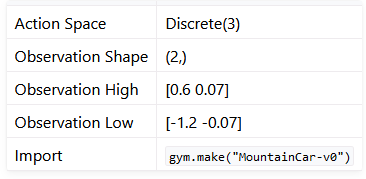

---

In [3]:
#Object's type in the action space
print("The Action Space is an object of type: {0}\n".format(env.action_space))
#Shape of the Action Space
print("The Shape of the Action Space is: {0}\n".format(env.action_space.n))
#Object's type in the Observation Space
print("The Environment Space is an object of type: {0}\n".format(env.observation_space))
#Shape of the Observation space
print("The Shape of the dimention Space are: {0}\n".format(env.observation_space.shape))
#The High and Low values in the observation space
print("The High values in the observation space are {0}, The Low values are {1}\n".format(
env.observation_space.high,env.observation_space.low))
#Minimum and Maximum car position 
print("The Minimum and Maximum Car's Position are: {0}, {1}\n".format(
env.observation_space.low[0],env.observation_space.high[0]))
#Minimum and Maximum Car Velocity
print("The Minimum and Maximum Car's Velocity are: {0}, {1}\n".format(
env.observation_space.low[1],env.observation_space.high[1]))
#Example of observation
print("The Observations at a given timestep are {0}\n".format(env.observation_space.sample()))

The Action Space is an object of type: Discrete(3)

The Shape of the Action Space is: 3

The Environment Space is an object of type: Box([-1.2  -0.07], [0.6  0.07], (2,), float32)

The Shape of the dimention Space are: (2,)

The High values in the observation space are [0.6  0.07], The Low values are [-1.2  -0.07]

The Minimum and Maximum Car's Position are: -1.2000000476837158, 0.6000000238418579

The Minimum and Maximum Car's Velocity are: -0.07000000029802322, 0.07000000029802322

The Observations at a given timestep are [ 0.43777692 -0.03283677]



<div style="border-radius:10px; border:maroon; padding: 15px; background-color: #F8EBEE; font-size:100%; text-align:left">

---
### **Notice:**
* This tells us that the state space represents a 2-dimensional box, so each state
observation is a vector of 2 (float) values, and that the action space comprises three
discrete actions (which is what we already knew).

* By default, the three actions are represented by the integers 0, 1 and 2.
From this, we can see that the first element of the state vector (representing the cart’s
position) can take on any value in the range -1.2 to 0.6, while the second element
(representing the cart’s velocity) can take on any value in the range -0.07 to 0.07.
---

<div style="border-radius:10px; border:maroon; padding: 15px; background-color: #F8EBEE; font-size:100%; text-align:left">

---

## Q-learning algorithm

The Q-learning algorithm is guaranteed to converge if each state-action pair is visited a sufficiently large number of times. In this situation, however, we are dealing with a continuous state space, which means that there are infinitely many state-action pairs, making it impossible to satisfy this condition.

a solution is to just discretize the state space. One simple way in which this can be done is to round the first element of the state vector to the nearest 0.1 and the second element to the nearest 0.01, and then (for convenience) multiply the first element by 10 and the second by 100.

This reduces the number of state-action pairs down to 855, which now makes it possible to satisfy the condition required for Q-learning to converge.

---

<div style="border-radius:10px; border:maroon; padding: 15px; background-color: #F8EBEE; font-size:100%; text-align:left">

--- 

# Q-Learning inOpenAI Gym
To implement Q-learning in OpenAI Gym, we need ways of observing the current state;
taking an action and observing the consequences of that action. These can be done as
follows.
The initial state of an environment is returned when you reset the environment:

----

In [6]:
print(env.reset())

[-0.5420577  0.       ]


* To take an action (for example, a = 2), it is necessary to “step forward” the environment by that action using the step() method. This returns a 4-ple giving the new state, reward, a Boolean indicating whether or not the episode has terminated (due to the goal being reached or 200 steps having elapsed), and any additional information (this is always empty for this problem).

In [7]:
print(env.step(2))

(array([-0.5409193 ,  0.00113837], dtype=float32), -1.0, False, {})


<div style="border-radius:10px; border:maroon; padding: 15px; background-color: #F8EBEE; font-size:100%; text-align:left">

---

# Q-Learning Recap
In the Q-learning algorithm, we assumed a one-dimensional state space, so our goal was to find the optimal Q table, Q(s,a).

In this problem, since we our dealing with a two-dimensional state space, we replace Q(s, a) with Q(s1, s2, a), but other than that, the Q-learning algorithm remains more or less the same.

To recap, the algorithm is as follows:

Initialize Q(s1, s2, a) by setting all of the elements equal to small random values;
Observe the current state, (s1, s2);
Based on the exploration strategy, choose an action to take, a;
Take action, a, and observe the resulting reward, r, and the new state of the environment, (s1’, s2’);
Update Q(s1, s2, a) based on the update rule: Q’(s1, s2, a) = (1 — w)Q(s1, s2, a) + w(r+d*Q(s1’, s2’, argmax a’ Q(s1’, s2’, a’)))
Where w is the learning rate and d is the discount rate;

Repeat steps 2–5 until convergence.

---

* ###  We can put all of the above together with the algorithm from the previous section and produce the following function for implementing Q-learning.

In [8]:
import numpy as np
import gym
import matplotlib.pyplot as plt

# Import and initialize Mountain Car Environment
env = gym.make('MountainCar-v0')
env.reset()

# Define Q-learning function
def QLearning(env, learning, discount, epsilon, min_eps, episodes):
    # Determine size of discretized state space
    num_states = (env.observation_space.high - env.observation_space.low)*\
                    np.array([10, 100])
    num_states = np.round(num_states, 0).astype(int) + 1
    
    # Initialize Q table
    Q = np.random.uniform(low = -1, high = 1, 
                          size = (num_states[0], num_states[1], 
                                  env.action_space.n))
    
    # Initialize variables to track rewards
    reward_list = []
    ave_reward_list = []
    
    # Calculate episodic reduction in epsilon
    reduction = (epsilon - min_eps)/episodes
    
    # Run Q learning algorithm
    for i in range(episodes):
        # Initialize parameters
        done = False
        tot_reward, reward = 0,0
        state = env.reset()
        
        # Discretize state
        state_adj = (state - env.observation_space.low)*np.array([10, 100])
        state_adj = np.round(state_adj, 0).astype(int)
    
        while done != True:   
            # Render environment for last five episodes
            if i >= (episodes - 20):
                env.render()
                
            # Determine next action - epsilon greedy strategy
            if np.random.random() < 1 - epsilon:
                action = np.argmax(Q[state_adj[0], state_adj[1]]) 
            else:
                action = np.random.randint(0, env.action_space.n)
                
            # Get next state and reward
            state2, reward, done, info = env.step(action) 
            
            # Discretize state2
            state2_adj = (state2 - env.observation_space.low)*np.array([10, 100])
            state2_adj = np.round(state2_adj, 0).astype(int)
            
            #Allow for terminal states
            if done and state2[0] >= 0.5:
                Q[state_adj[0], state_adj[1], action] = reward
                
            # Adjust Q value for current state
            else:
                delta = learning*(reward + 
                                 discount*np.max(Q[state2_adj[0], 
                                                   state2_adj[1]]) - 
                                 Q[state_adj[0], state_adj[1],action])
                Q[state_adj[0], state_adj[1],action] += delta
                                     
            # Update variables
            tot_reward += reward
            state_adj = state2_adj
        
        # Decay epsilon
        if epsilon > min_eps:
            epsilon -= reduction
        
        # Track rewards
        reward_list.append(tot_reward)
        
        if (i+1) % 100 == 0:
            ave_reward = np.mean(reward_list)
            ave_reward_list.append(ave_reward)
            reward_list = []
            
    
    
    return ave_reward_list


In [9]:
import os
try:
    os.environ['DISPLAY']
except:
    os.environ['SDL_VIDEODRIVER']='dummy'

## <b><span style='color:purple'>Run Q-learning algorithm for 1000 episodes</span></b> 

Text(0.5, 1.0, 'Average Reward vs Episodes')

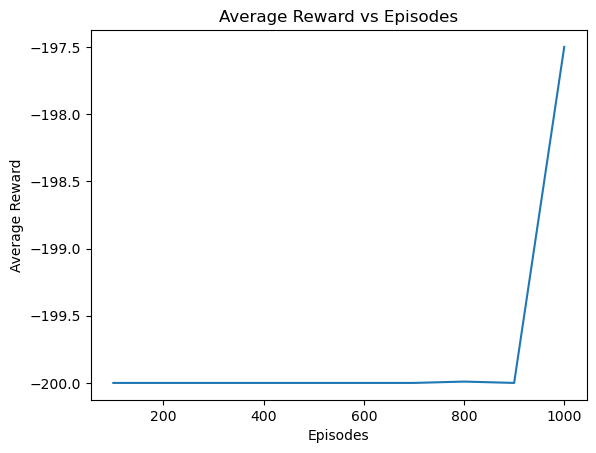

In [10]:
# QLearning(env, learning, discount, epsilon, min_eps, episodes)
rewards = QLearning(env, 0.2, 0.9, 0.8, 0, 1000)
plt.plot(100*(np.arange(len(rewards)) + 1), rewards)
plt.xlabel('Episodes')
plt.ylabel('Average Reward')
plt.title('Average Reward vs Episodes')

* ### In the final 1000 episodes, the algorithm takes what it’s learned through exploration and exploits it in order to increase the average reward

## <b><span style='color:purple'>Run Q-learning algorithm for 5000 episodes</span></b> 

Text(0.5, 1.0, 'Average Reward vs Episodes')

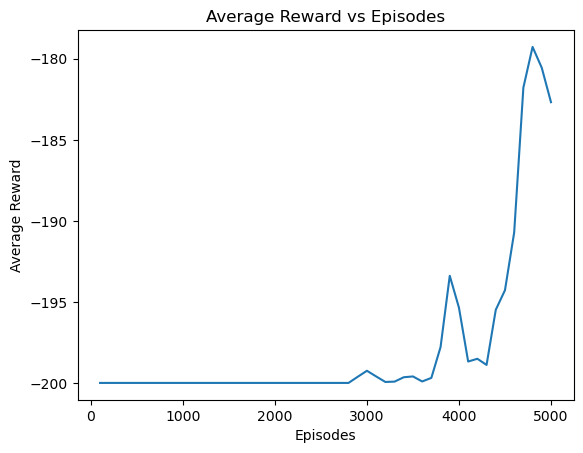

In [11]:
# QLearning(env, learning, discount, epsilon, min_eps, episodes)
rewards = QLearning(env, 0.2, 0.9, 0.8, 0, 5000)
plt.plot(100*(np.arange(len(rewards)) + 1), rewards)
plt.xlabel('Episodes')
plt.ylabel('Average Reward')
plt.title('Average Reward vs Episodes')

## <b><span style='color:purple'> Run Q-learning algorithm for 5000 episodes and epsilon = 0.5</span></b> 

Text(0.5, 1.0, 'Average Reward vs Episodes')

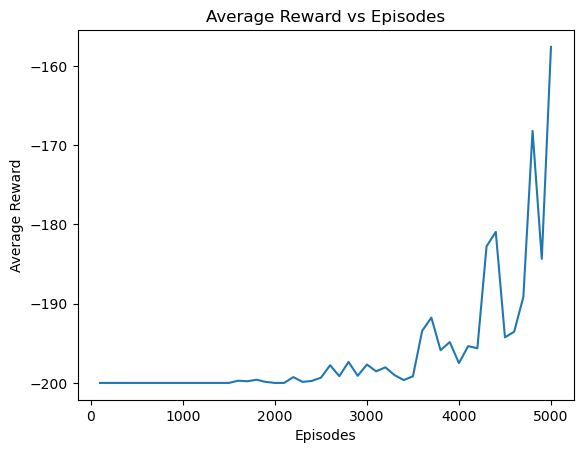

In [12]:
# QLearning(env, learning, discount, epsilon, min_eps, episodes)
rewards = QLearning(env, 0.2, 0.9, 0.5, 0, 5000)
plt.plot(100*(np.arange(len(rewards)) + 1), rewards)
plt.xlabel('Episodes')
plt.ylabel('Average Reward')
plt.title('Average Reward vs Episodes')

## <b><span style='color:purple'> Run Q-learning algorithm for 5000 discount = 0.5</span></b> 

Text(0.5, 1.0, 'Average Reward vs Episodes')

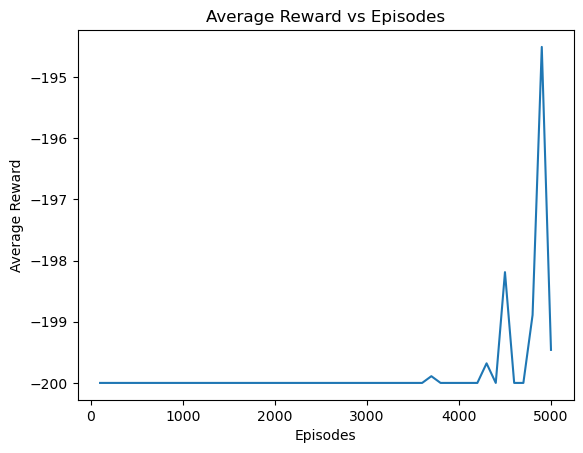

In [13]:
# QLearning(env, learning, discount, epsilon, min_eps, episodes)
rewards = QLearning(env, 0.2, 0.5, 0.8, 0, 5000)
plt.plot(100*(np.arange(len(rewards)) + 1), rewards)
plt.xlabel('Episodes')
plt.ylabel('Average Reward')
plt.title('Average Reward vs Episodes')

## <b><span style='color:purple'> Run Q-learning algorithm for 5000 episodes epsilon = 0.1</span></b> 

Text(0.5, 1.0, 'Average Reward vs Episodes')

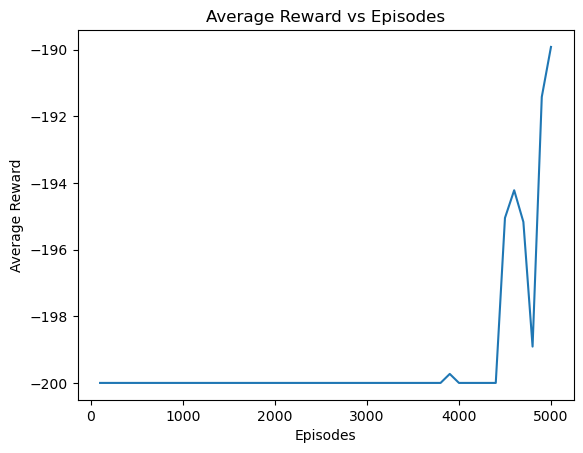

In [14]:
# QLearning(env, learning, discount, epsilon, min_eps, episodes)
rewards = QLearning(env, 0.2, 0.1, 0.8, 0, 5000)
plt.plot(100*(np.arange(len(rewards)) + 1), rewards)
plt.xlabel('Episodes')
plt.ylabel('Average Reward')
plt.title('Average Reward vs Episodes')

<div style="border-radius:10px; border:maroon; padding: 15px; background-color: #F8EBEE; font-size:100%; text-align:left">

--- 
* ###  Notice:
If we increase the number of episodes by an order of magnitude to 5000, however, by the end of the 5000 episodes the car is able to ascend the mountain perfectly, almost every time.

---

<div style="border-radius:10px; border:maroon; padding: 15px; background-color: #F8EBEE; font-size:100%; text-align:left">

---
# Summary:
we have demonstrated how RL can be used to solve the OpenAI Gym Mountain Car problem. To solve this problem, it was necessary to discretize our state space and make some small modifications to the Q-learning algorithm.
    
---

## <b><span style='color:darkred'>The Last Project of This Course👋💥<b><span>